# Matplotlib
* https://matplotlib.org/stable/

[API Reference](https://matplotlib.org/stable/api/index.html)
* Axes接口: 基于对象
  * 创建一个`Figure`, 一个或多个`Axes`, 使用这些对象上的方法.
* pyplot接口: 基于函数
  * 隐式的`Figure`和`Axes`
  * [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

Marker
* https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle


In [2]:
!pip install matplotlib
# conda
# !conda install -c conda-forge matplotlib

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /home/zhoujiagen/.local/lib/python3.12/site-packages/pjsua2-2.15.1-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
# cleanup
!pip uninstall matplotlib -y

In [3]:
%matplotlib inline
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt

'3.9.2'

# 02 子图绘制, 使用Figure/AxesSubplot上方法

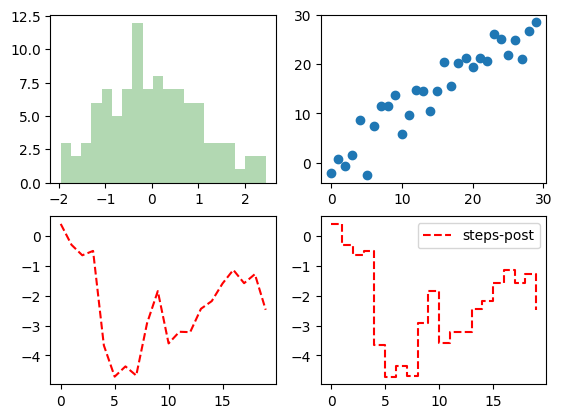

In [2]:
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# 在ax3上绘制
cumsum = np.random.randn(20).cumsum();
plt.plot(cumsum, 'r--') # 非实际数据点默认按线性方式插值

ax4 = fig.add_subplot(2,2,4)
plt.plot(cumsum, 'r--', drawstyle='steps-post', label='steps-post') # drawstyle='steps-post' ???
plt.legend(loc='best') # 图例

# 在ax1上绘制, 直方图
_ = ax1.hist(np.random.randn(100), bins=20, color='g', alpha=0.3)
# 在ax2上绘制, 散点图
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

#fig.show()

# 03 子图绘制, 使用matplotlib.pyplot方法

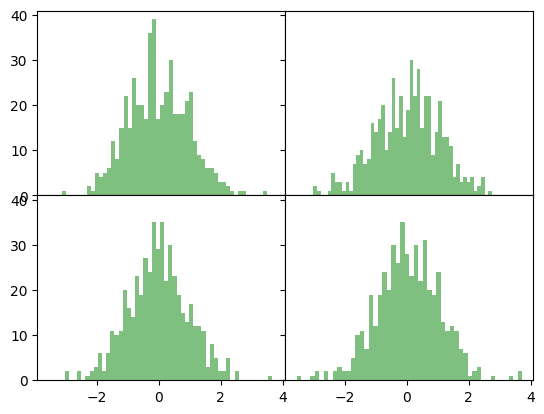

In [3]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True) # 所有子图
for i in range(2):
    for j in range(2):
        #axes[i,j].set_xlim([-5, 5]) # 设置范围
        axes[i,j].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)
# 调整子图间的间距
plt.subplots_adjust(wspace=0, hspace=0)

# 04 设置标题, 轴标签, 刻度和刻度标签

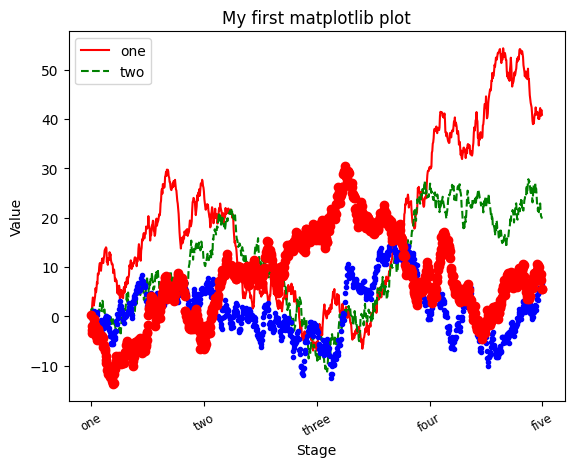

In [4]:
### 两种方式: plt.xlim(), AxesSubplot.set_xlim()
### 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'r', label='one') # label用于图例
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'b.', label='_nolegend_') # 不纳入图例
ax.plot(np.random.randn(1000).cumsum(), 'ro') # 不纳入图例
# 刻度和刻度标签
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
# 标题
ax.set_title('My first matplotlib plot')
# 轴标签
ax.set_xlabel('Stage')
ax.set_ylabel('Value')
# 图例(legend)
ax.legend(loc='best')

# 05 中文支持

In [5]:
import matplotlib.font_manager as fm

# matplotlib only know these fonts
font_list = [f for f in fm.fontManager.ttflist]

# check font names what you want
cjk_list = ['CJK']#['CJK', 'Han', 'CN', 'TW']

for f in font_list:
    if any(s.lower() in f.name.lower() for s in cjk_list):
        print(f'name={f.name}, path={f.fname}')

Text(0.5, 1.0, '中文标题')

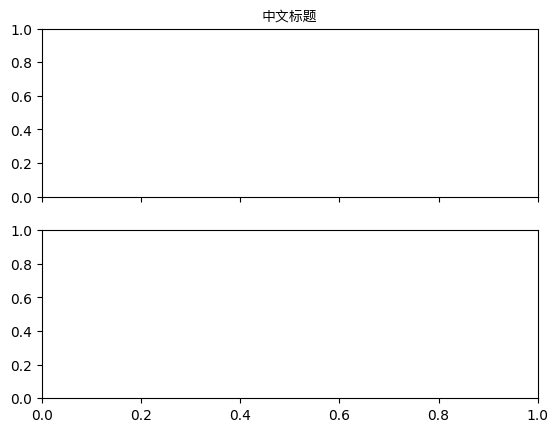

In [6]:
# import matplotlib
# matplotlib.font_manager._load_fontmanager(try_read_cache=False)

import matplotlib.font_manager as fm
# the location of the font file
font_path = '/System/Library/Fonts/PingFang.ttc'
# get the font based on the font_path
my_font = fm.FontProperties(fname=font_path)

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
# axes[0].set_title(u'中文标题')
axes[0].set_title(u'中文标题', fontproperties=my_font)